In [7]:
df <- read.csv("../movies/movie109_ver1.csv",fileEncoding = "utf-8")

In [8]:
library(dplyr)

In [9]:
df <- arrange(df , desc(누적관객수))

In [10]:
head(df)

영화명,누적매출액,누적관객수,스크린수,상영횟수,개봉일,배급사,등급,장르,감독,배우,제작사,cluster,조연
기생충,85883963645,10085275,1948,192855,2019-05-30,CJ ENM,15세이상관람가,드라마,봉준호,"송강호,이선균,조여정,최우식,박소담,이정은,장혜진",(주)바른손이앤에이,3,"박명훈,정지소,정현준"
검사외전,77320403264,9707581,1812,153532,2016-02-03,(주)쇼박스,15세이상관람가,"범죄,코미디",이일형,"황정민,강동원","(주)영화사 월광,(주)사나이픽처스",3,"이성민,박성웅,김응수,신소율,박종환,한재영,주진모,김원해,전배수,김홍파,김병옥,박지환,이호철,손종학,김종수,추귀정,민무제"
엑시트,79232012162,9426011,1660,202223,2019-07-31,CJ ENM,12세이상관람가,"코미디,액션",이상근,"조정석,윤아","(주)외유내강,(주)필름케이",3,"고두심,박인환,김지영,강기영,김종구,김병순,황효은,이봉련,정민성,박성일,배유람,유수빈,신세휘,김강훈"
설국열차,67012235200,9350323,1128,124858,2013-08-01,CJ ENM,15세이상관람가,"SF,액션",봉준호,"크리스 에반스,송강호,에드 해리스,존 허트,틸다 스윈튼,제이미 벨,옥타비아 스펜서,이완 브렘너,알리슨 필,고아성","(주)모호필름,오퍼스픽쳐스(유)",3,"스티브 박,루크 파스콸리노,케니 도우티,클락 미들튼,블라드 이바노브,아드난 해스커빅,엠마 레비,토마스 레마르퀴스,이고르 주릭,위헬미나 맥패든,타일러 존 윌리엄스"
관상,66009791500,9135802,1240,125105,2013-09-11,(주)쇼박스,15세이상관람가,"사극,드라마",한재림,"송강호,이정재,백윤식,조정석,이종석,김혜수","(주)주피터필름,(주)쇼박스",3,"김의성,정규수,채상우,이윤건,이도엽,유상재"
해적: 바다로 간 산적,66372140706,8666208,910,133354,2014-08-06,롯데쇼핑㈜롯데엔터테인먼트,12세이상관람가,어드벤처,이석훈,"김남길,손예진",(주)하리마오픽쳐스,3,"유해진,이경영,오달수,김태우,박철민,신정근,김원해,조달환,조희봉,정성화,최진리,이이경,안내상,김경식,이대연"


In [11]:
str(df)

'data.frame':	109 obs. of  14 variables:
 $ 영화명    : Factor w/ 109 levels "1987","7급 공무원",..: 25 11 72 56 18 106 57 17 19 40 ...
 $ 누적매출액: num  8.59e+10 7.73e+10 7.92e+10 6.70e+10 6.60e+10 ...
 $ 누적관객수: int  10085275 9707581 9426011 9350323 9135802 8666208 8658800 8223266 8035181 7855474 ...
 $ 스크린수  : int  1948 1812 1660 1128 1240 910 1027 408 570 622 ...
 $ 상영횟수  : int  192855 153532 202223 124858 125105 133354 136985 145555 131671 96439 ...
 $ 개봉일    : Factor w/ 104 levels "2005-01-27","2005-07-29",..: 99 69 100 50 53 60 55 17 21 11 ...
 $ 배급사    : Factor w/ 17 levels "(주)넥스트엔터테인먼트월드(NEW)",..: 7 2 7 7 2 10 7 10 2 2 ...
 $ 등급      : Factor w/ 7 levels "12세관람가","12세이상관람가",..: 4 4 2 4 4 2 4 2 2 2 ...
 $ 장르      : Factor w/ 50 levels "SF,액션","공포(호러),SF",..: 4 23 49 1 25 41 4 44 8 40 ...
 $ 감독      : Factor w/ 80 levels "강대규","강우석",..: 32 50 43 32 76 44 79 4 14 35 ...
 $ 배우      : Factor w/ 109 levels "T.O.P,신세경,곽도원,이하늬",..: 49 105 88 96 50 9 53 93 99 81 ...
 $ 제작사    : Factor w/ 93 leve

In [12]:
df$배우 <- as.character(df$배우)

In [13]:
ju <- c()

for (i in 1: nrow(df)){
    temp_ju <- unlist(strsplit(df$배우[i],","))
    ju <- c(ju,temp_ju)
}

In [14]:
ju_df <- data.frame(table(ju))
colnames(ju_df) <- c('주연',"횟수")

In [15]:
head(ju_df)

주연,횟수
T.O.P,2
강동원,6
강소라,1
강신일,1
강예원,3
강지환,1


In [16]:
ju_df$점수 = 0
head(ju_df)

주연,횟수,점수
T.O.P,2,0
강동원,6,0
강소라,1,0
강신일,1,0
강예원,3,0
강지환,1,0


In [17]:
df$배우 <- as.character(df$배우)

In [18]:
for(i in 1:nrow(df)){
    for( j in 1:nrow(ju_df)){
        if(ju_df[j,1] %in% unlist(strsplit(df$배우[i],","))){
            if(df$cluster[i] == 1){
                ju_df$점수[j] = ju_df$점수[j] + 1
            }else if(df$cluster[i] == 2){
                ju_df$점수[j] = ju_df$점수[j] + 2
            }else{
                ju_df$점수[j] = ju_df$점수[j] + 4
            }
        }
    }
}

In [19]:
ju_df<- arrange(ju_df,desc(점수))

In [20]:
head(ju_df,10)

주연,횟수,점수
하정우,10,27
송강호,7,24
유해진,8,21
황정민,7,21
강동원,6,16
이병헌,6,16
김윤석,8,15
성동일,4,11
오달수,4,11
이정재,4,11


In [21]:
ju_df$평균점수 = 0

In [22]:
for( i in 1: nrow(ju_df)){
    ju_df$평균점수[i] <- ju_df$점수[i] / ju_df$횟수[i] 
}


In [46]:
x<-c()
for( i in 1:nrow(df)){
    if("김윤석" %in% unlist(strsplit(df$배우[i],","))){
         x= c(x,i)
    }
}

In [47]:
df[x,]

,영화명,누적매출액,누적관객수,스크린수,상영횟수,개봉일,배급사,등급,장르,감독,배우,제작사,cluster,조연
16,1987,58169776145,7232387,1299,138226,2017-12-27,CJ ENM,15세이상관람가,드라마,장준환,"김윤석,하정우,유해진,김태리,박희순,이희준",(주)우정필름,3,"유승목,현봉식,박지환,이용직,박지홍,김경덕,김의성,최광일,김수진,김종수,김혜정,조우진,임철형,이창훈,서현우,이현균,김승훈,박경혜,이화룡"
35,전우치,44092783000,6065369,612,102356,2009-12-23,CJ ENM,12세이상관람가,"액션,코미디,판타지",최동훈,"강동원,김윤석,임수정,유해진",영화사 집,2,"송영창,주진모,김상호,선우선,공정환,권태원,이숙,박남희,이용녀,김기천"
43,검은 사제들,42409600592,5442915,1109,131177,2015-11-05,CJ ENM,15세이상관람가,"미스터리,드라마",장재현,"김윤석,강동원",영화사 집,2,"박소담,김의성,손종학,이호재,남일우,김병옥,조수향,박웅,이정열,김소숙,민진웅,유수미"
47,완득이,38533069000,5311232,629,117847,2011-10-20,CJ ENM,12세이상관람가,드라마,이한,"김윤석,유아인","(주)유비유필름,어나더픽쳐스(주)",2,"박수영,이자스민,김상호,김영재,박효주,강별,김동영"
52,추격자,33986959000,5046096,433,106805,2008-02-14,(주)쇼박스,청소년관람불가,"범죄,스릴러,액션",나홍진,"김윤석,하정우",(주)영화사비단길,2,"서영희,구본웅,김유정,정인기,박효주,최정우,민경진"
80,남한산성,31225419792,3849129,1229,71102,2017-10-03,CJ ENM,15세이상관람가,"사극,드라마",황동혁,"이병헌,김윤석,박해일,고수,박희순",(주)싸이런픽쳐스,1,"송영창,조우진,이다윗,허성태,김법래,조아인,진선규,유순웅,박지일,최종률,문창길,김서현,김중기,윤세웅,신기준,곽자형"
81,암수살인,32998321048,3789553,1177,126128,2018-10-03,(주)쇼박스,15세이상관람가,"범죄,드라마",김태균,"김윤석,주지훈","(주)필름295,(주)블러썸픽쳐스",1,"진선규,정종준,허진,김중기,김영웅,정기섭,이봉련,전국환,김종수,배해선,권소현,원현준"
106,거북이 달린다,20618276000,3024666,432,69946,2009-06-11,(주)쇼박스,15세이상관람가,"드라마,액션,범죄",이연우,"김윤석,정경호,견미리,선우선",(주)씨네이천,1,"김지나,신정근,최권,차은재,주진모,이무생,유하복,임형택,김희원"


In [39]:
head(df,1)

영화명,누적매출액,누적관객수,스크린수,상영횟수,개봉일,배급사,등급,장르,감독,배우,제작사,cluster,조연
기생충,85883963645,10085275,1948,192855,2019-05-30,CJ ENM,15세이상관람가,드라마,봉준호,"송강호,이선균,조여정,최우식,박소담,이정은,장혜진",(주)바른손이앤에이,3,"박명훈,정지소,정현준"


In [42]:
"하정우" %in% unlist(substr(df$배우,","))

Warning message in substr(df$배우, ","):
"강제형변환에 의해 생성된 NA 입니다"

ERROR: Error in substr(df$배우, ","): 기본값이 없는 인수 "stop"가 누락되어 있습니다


In [31]:
arrange(ju_df,desc(점수))

주연,횟수,점수,평균점수
하정우,10,27,2.700000
송강호,7,24,3.428571
유해진,8,21,2.625000
황정민,7,21,3.000000
강동원,6,16,2.666667
이병헌,6,16,2.666667
김윤석,8,15,1.875000
성동일,4,11,2.750000
오달수,4,11,2.750000
이정재,4,11,2.750000


In [52]:
temp_ju_df<-arrange(subset(ju_df, 횟수 >=3),desc(평균점수))

In [55]:
shapiro.test(temp_ju_df[,4])


	Shapiro-Wilk normality test

data:  temp_ju_df[, 4]
W = 0.97696, p-value = 0.5622


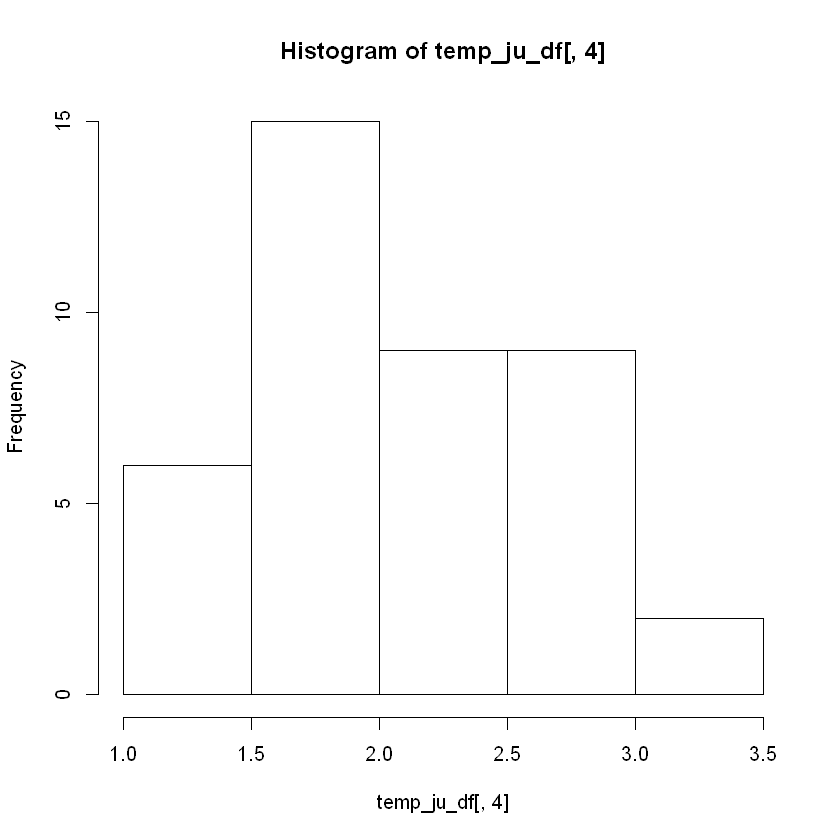

In [54]:
hist(temp_ju_df[,4])

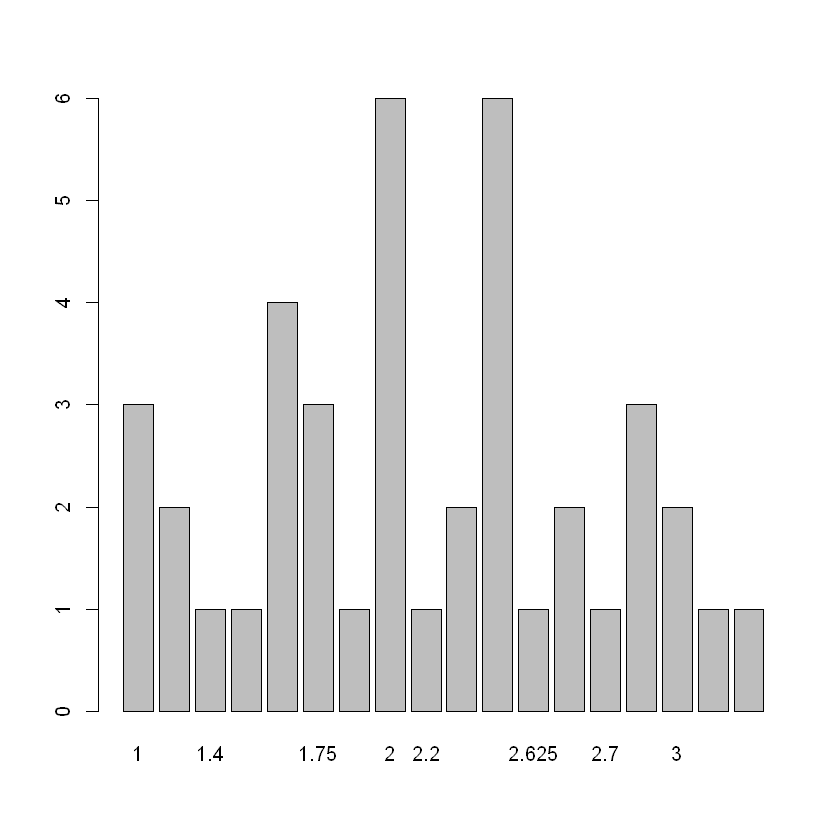

In [53]:
barplot(table(temp_ju_df[,4]))

In [24]:
x<-c()
for( i in 1:nrow(df)){
    if("성동일" %in% unlist(strsplit(df$배우[i],","))){
           x<-c(x,i)
    }
}

In [25]:
df[x,]

,영화명,누적매출액,누적관객수,스크린수,상영횟수,개봉일,배급사,등급,장르,감독,배우,제작사,cluster,조연
7,수상한 그녀,62710880849,8658800,1027,136985,2014-01-22,CJ ENM,15세이상관람가,드라마,황동혁,"심은경,나문희,박인환,성동일,이진욱","(주)예인플러스엔터테인먼트,아이앤코스모스(주)시네와이즈필름",3,"김현숙,황정민,김슬기,진영,하연주,박혜진,정인기,장유,홍석연,박형우,이상언,박승태,한지은,강한샘"
9,국가대표,57570773000,8035181,570,131671,2009-07-29,(주)쇼박스,12세이상관람가,"드라마,액션,코미디",김용화,"하정우,성동일,김지석,김동욱,최재환,이재응,이은성",케이엠컬쳐㈜,3,"이한위,이혜숙,김지영,현쥬니,황하나"
54,바람과 함께 사라지다,34614661161,4909937,694,78591,2012-08-08,(주)넥스트엔터테인먼트월드(NEW),12세이상관람가,"코미디,사극",김주호,"차태현,오지호,민효린,성동일,신정근,고창석","(주)두타연,(주)에이디사공육",2,"송종호,이채영,천보근,김향기,김길동,김구택,독고준"
100,탐정: 리턴즈,26909514678,3152895,1137,107909,2018-06-13,CJ ENM,15세이상관람가,"코미디,범죄",이언희,"권상우,성동일,이광수",(주)크리픽쳐스,1,"서영희,남명렬,최덕문,손담비,이일화,최성원,박성일,정연주,오희준,김성규,김중기,이청희,김용준,박성연,홍서백,홍은택"


In [26]:
"오달수" %in% unlist(strsplit(df$배우[1],","))

[1] FALSE

In [27]:
str(df)

'data.frame':	109 obs. of  14 variables:
 $ 영화명    : Factor w/ 109 levels "1987","7급 공무원",..: 25 11 72 56 18 106 57 17 19 40 ...
 $ 누적매출액: num  8.59e+10 7.73e+10 7.92e+10 6.70e+10 6.60e+10 ...
 $ 누적관객수: int  10085275 9707581 9426011 9350323 9135802 8666208 8658800 8223266 8035181 7855474 ...
 $ 스크린수  : int  1948 1812 1660 1128 1240 910 1027 408 570 622 ...
 $ 상영횟수  : int  192855 153532 202223 124858 125105 133354 136985 145555 131671 96439 ...
 $ 개봉일    : Factor w/ 104 levels "2005-01-27","2005-07-29",..: 99 69 100 50 53 60 55 17 21 11 ...
 $ 배급사    : Factor w/ 17 levels "(주)넥스트엔터테인먼트월드(NEW)",..: 7 2 7 7 2 10 7 10 2 2 ...
 $ 등급      : Factor w/ 7 levels "12세관람가","12세이상관람가",..: 4 4 2 4 4 2 4 2 2 2 ...
 $ 장르      : Factor w/ 50 levels "SF,액션","공포(호러),SF",..: 4 23 49 1 25 41 4 44 8 40 ...
 $ 감독      : Factor w/ 80 levels "강대규","강우석",..: 32 50 43 32 76 44 79 4 14 35 ...
 $ 배우      : chr  "송강호,이선균,조여정,최우식,박소담,이정은,장혜진" "황정민,강동원" "조정석,윤아" "크리스 에반스,송강호,에드 해리스,존 허트,틸다 스윈튼,제이미 벨,옥타비아 스펜서,이완 브렘너,

In [28]:
arrange(subset(df,cluster == 3),desc(누적관객수))

영화명,누적매출액,누적관객수,스크린수,상영횟수,개봉일,배급사,등급,장르,감독,배우,제작사,cluster,조연
기생충,85883963645,10085275,1948,192855,2019-05-30,CJ ENM,15세이상관람가,드라마,봉준호,"송강호,이선균,조여정,최우식,박소담,이정은,장혜진",(주)바른손이앤에이,3,"박명훈,정지소,정현준"
검사외전,77320403264,9707581,1812,153532,2016-02-03,(주)쇼박스,15세이상관람가,"범죄,코미디",이일형,"황정민,강동원","(주)영화사 월광,(주)사나이픽처스",3,"이성민,박성웅,김응수,신소율,박종환,한재영,주진모,김원해,전배수,김홍파,김병옥,박지환,이호철,손종학,김종수,추귀정,민무제"
엑시트,79232012162,9426011,1660,202223,2019-07-31,CJ ENM,12세이상관람가,"코미디,액션",이상근,"조정석,윤아","(주)외유내강,(주)필름케이",3,"고두심,박인환,김지영,강기영,김종구,김병순,황효은,이봉련,정민성,박성일,배유람,유수빈,신세휘,김강훈"
설국열차,67012235200,9350323,1128,124858,2013-08-01,CJ ENM,15세이상관람가,"SF,액션",봉준호,"크리스 에반스,송강호,에드 해리스,존 허트,틸다 스윈튼,제이미 벨,옥타비아 스펜서,이완 브렘너,알리슨 필,고아성","(주)모호필름,오퍼스픽쳐스(유)",3,"스티브 박,루크 파스콸리노,케니 도우티,클락 미들튼,블라드 이바노브,아드난 해스커빅,엠마 레비,토마스 레마르퀴스,이고르 주릭,위헬미나 맥패든,타일러 존 윌리엄스"
관상,66009791500,9135802,1240,125105,2013-09-11,(주)쇼박스,15세이상관람가,"사극,드라마",한재림,"송강호,이정재,백윤식,조정석,이종석,김혜수","(주)주피터필름,(주)쇼박스",3,"김의성,정규수,채상우,이윤건,이도엽,유상재"
해적: 바다로 간 산적,66372140706,8666208,910,133354,2014-08-06,롯데쇼핑㈜롯데엔터테인먼트,12세이상관람가,어드벤처,이석훈,"김남길,손예진",(주)하리마오픽쳐스,3,"유해진,이경영,오달수,김태우,박철민,신정근,김원해,조달환,조희봉,정성화,최진리,이이경,안내상,김경식,이대연"
수상한 그녀,62710880849,8658800,1027,136985,2014-01-22,CJ ENM,15세이상관람가,드라마,황동혁,"심은경,나문희,박인환,성동일,이진욱","(주)예인플러스엔터테인먼트,아이앤코스모스(주)시네와이즈필름",3,"김현숙,황정민,김슬기,진영,하연주,박혜진,정인기,장유,홍석연,박형우,이상언,박승태,한지은,강한샘"
과속스캔들,53800771400,8223266,408,145555,2008-12-03,롯데쇼핑㈜롯데엔터테인먼트,12세이상관람가,코미디,강형철,"차태현,박보영,왕석현","(주)토일렛픽쳐스,(주)디씨지플러스",3,"임지규,황우슬혜,임승대,정원중,김기방,박영서"
국가대표,57570773000,8035181,570,131671,2009-07-29,(주)쇼박스,12세이상관람가,"드라마,액션,코미디",김용화,"하정우,성동일,김지석,김동욱,최재환,이재응,이은성",케이엠컬쳐㈜,3,"이한위,이혜숙,김지영,현쥬니,황하나"
디워,49340084700,7855474,622,96439,2007-08-01,(주)쇼박스,12세이상관람가,"액션,판타지",심형래,"제이슨 베어,아만다 브룩스,크레이그 로빈슨,엘리자베스 페나,로버트 포스터",㈜영구아트,3,"크리스 멀키,에이미 가르시아,존 알레스,빌리 가델"


In [29]:
(4313101 +4452850 )/2

[1] 4382976

In [30]:
4382976

[1] 4382976